## 주제 : 정형 데이터 분석 분야  
### (어드밴스드 리그) 클래식 공연 활성화를 위한 예술의 전당 콘서트홀의 효과적 가격 모델 수립

![Alt text](image-1.png)

### 제공 데이터타입과 실제 데이터 타입  
![Alt text](media.png)

In [46]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv파일 불러오기

df = pd.read_csv('2023빅콘테스트_어드밴스드리그_예술의전당.csv', encoding = 'utf8')

In [3]:
df.shape

(1920868, 24)

In [4]:
# 데이터셋 확인
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [12]:
df.info() # non-null count 표시가 안되면 옵션값 부여

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920868 entries, 0 to 1920867
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   age                float64
 1   gender             object 
 2   membership_type_1  object 
 3   membership_type_2  object 
 4   membership_type_3  object 
 5   membership_type_4  object 
 6   membership_type_5  object 
 7   membership_type_6  float64
 8   tran_date          int64  
 9   tran_time          int64  
 10  play_date          int64  
 11  play_st_time       int64  
 12  seat               object 
 13  price              int64  
 14  ticket_cancel      int64  
 15  discount_type      object 
 16  performance_code   int64  
 17  pre_open_date      float64
 18  open_date          float64
 19  genre              object 
 20  place              object 
 21  running_time       int64  
 22  intermission       int64  
 23  member_yn          object 
dtypes: float64(4), int64(9), object(11)
memory usage: 

In [10]:
# 결측값 확인하기
df.isna().sum()

age                  1300183
gender               1299714
membership_type_1    1299714
membership_type_2    1433215
membership_type_3    1749009
membership_type_4    1890675
membership_type_5    1919586
membership_type_6    1920868
tran_date                  0
tran_time                  0
play_date                  0
play_st_time               0
seat                       0
price                      0
ticket_cancel              0
discount_type              0
performance_code           0
pre_open_date         864385
open_date                340
genre                  25842
place                      0
running_time               0
intermission               0
member_yn                  0
dtype: int64

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age,membership_type_6,tran_date,tran_time,play_date,play_st_time,price,ticket_cancel,performance_code,pre_open_date,open_date,running_time,intermission
count,620685.00,0.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1920868.00,1056483.00,1920528.00,1920868.00,1920868.00
mean,42.40,NaN,20209376.56,1401.52,20209928.30,1836.36,19534.81,0.33,1449.54,20208853.14,20208839.90,104.48,14.12
std,14.60,NaN,15471.82,403.03,15344.37,212.82,42328.11,0.74,880.85,15027.87,15603.79,17.57,5.28
min,10.00,NaN,20181101.00,0.00,20181117.00,1000.00,0.00,0.00,1.00,20181028.00,20181029.00,0.00,0.00
25%,30.00,NaN,20191002.00,1136.00,20191029.00,1700.00,0.00,0.00,677.00,20190906.00,20190908.00,90.00,15.00
50%,40.00,NaN,20210919.00,1419.00,20211010.00,1930.00,0.00,0.00,1417.00,20210904.00,20210906.00,100.00,15.00
75%,50.00,NaN,20221015.00,1636.00,20221110.00,2000.00,24000.00,0.00,2221.00,20220820.00,20220917.00,120.00,15.00
max,80.00,NaN,20230703.00,2359.00,20230707.00,2000.00,480000.00,2.00,2938.00,20230526.00,20230625.00,350.00,30.00


In [16]:
# 컬럼명 활용을 위한 코드
df.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn'],
      dtype='object')

### 결측값 존재하는 컬럼

age                  1300183  
gender               1299714  
membership_type_1    1299714  
membership_type_2    1433215  
membership_type_3    1749009  
membership_type_4    1890675  
membership_type_5    1919586  
membership_type_6    1920868  
pre_open_date         864385  
open_date                340  
genre                  25842  


In [5]:
# 결측값이 존재하는 컬럼 삭제    
df.drop(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'pre_open_date', 'open_date', 'genre'],
       axis=1, inplace=True)

In [6]:
# 결측이 존재하는 열을 모두 삭제 이후 컬럼 상태
df.columns

Index(['tran_date', 'tran_time', 'play_date', 'play_st_time', 'seat', 'price',
       'ticket_cancel', 'discount_type', 'performance_code', 'place',
       'running_time', 'intermission', 'member_yn'],
      dtype='object')

In [7]:
# 정수 형태의 날짜값을 날짜형태의 데이터 유형으로 변경

df['tran_date'] = df['tran_date'].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))
df['play_date'] = df['play_date'].apply(lambda x: pd.to_datetime(str(x), format="%Y%m%d"))

'''
df['tran_date'] = df['tran_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y-%m-%d'))
df['play_date'] = df['play_date'].apply(lambda x: pd.to_datetime(str(x), format = "%Y-%m-%d"))
'''

'\ndf[\'tran_date\'] = df[\'tran_date\'].apply(lambda x: pd.to_datetime(str(x), format = \'%Y-%m-%d\'))\ndf[\'play_date\'] = df[\'play_date\'].apply(lambda x: pd.to_datetime(str(x), format = "%Y-%m-%d"))\n'

In [8]:
# 예매 거레일자, 공연날짜의 최소값, 최대값

print(df[['tran_date', 'play_date']].min())
print('--------------------')
print(df[['tran_date', 'play_date']].max())

tran_date   2018-11-01
play_date   2018-11-17
dtype: datetime64[ns]
--------------------
tran_date   2023-07-03
play_date   2023-07-07
dtype: datetime64[ns]


In [9]:
df['place'].value_counts()

place
콘서트홀      1096968
IBK챔버홀     477410
리사이틀홀      346490
Name: count, dtype: int64

In [33]:
# 년도별 데이터 추출

df.groupby(df['play_date'].dt.strftime('%Y')).sum()

In [ ]:
# 월별 데이터 추출

df.groupby(df['play_date'].dt.strftime('%m')).sum()

In [10]:
# 공연장별로 별도의 데이터 프레임 생성(콘서트홀)

place_temp = '콘서트홀'
df_con = df.query('place == @place_temp')

In [11]:
# 공연장별로 별도의 데이터 프레임 생성(콘서트홀)

place_temp = 'IBK챔버홀'
df_ibk = df.query('place == @place_temp')

In [12]:
# 공연장별로 별도의 데이터 프레임 생성(콘서트홀)

place_temp = '리사이틀홀'
df_rec = df.query('place == @place_temp')

In [13]:
df_con.to_csv('2023빅콘테스트_어드밴스드리그_예술의전당_con.csv')
df_ibk.to_csv('2023빅콘테스트_어드밴스드리그_예술의전당_ibk.csv')
df_rec.to_csv('2023빅콘테스트_어드밴스드리그_예술의전당_rec.csv')

In [ ]:
# 일반적인 머신러닝, 모델, 성능평가 등을 진행하면 됨

In [16]:
# 월별 데이터를 활용하여 표현하기

df_con_9 = df_con.query('play_date.dt.month == 9')
df_con_9

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn
38,2021-07-11,2344,2021-09-19,1700,1층 C블록15열 8,99000,2,골드회원 할인10%,2538,콘서트홀,110,20,Y
42,2019-09-13,1144,2019-09-24,2000,3층 F블록5열 5,0,0,초대권,31,콘서트홀,120,15,N
44,2019-08-23,1102,2019-09-04,2000,1층 E블록17열 1,25000,0,싹딜가(골드)50%,815,콘서트홀,100,15,Y
46,2019-09-05,1428,2019-09-10,2000,1층 D블록7열 11,0,0,초대권,452,콘서트홀,71,15,N
64,2022-09-05,956,2022-09-11,1700,1층 A블록8열 1,0,2,초대권,137,콘서트홀,100,15,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920630,2022-09-09,1618,2022-09-25,1700,1층 B블록7열 5,0,0,초대권,1693,콘서트홀,120,15,N
1920696,2022-09-16,1037,2022-09-20,1930,1층 A블록12열 7,0,0,초대권,1276,콘서트홀,100,15,N
1920717,2021-09-13,1742,2021-09-23,1930,1층 C블록6열 5,0,0,기획사판매,1281,콘서트홀,100,20,N
1920787,2022-08-11,1140,2022-09-23,1930,1층 A블록8열 10,0,0,기획사판매,404,콘서트홀,120,15,N


In [19]:
# 공연날짜, 공연시간 컬럼을 이용해서 고유한(독립된) 컬럼을 생성

df_con_9['join'] = df_con_9['play_date'].astype(str) + '_' + df_con_9['play_st_time'].astype(str)
df_con_9.head()

C:\Users\thesw\AppData\Local\Temp\ipykernel_9440\336673459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_9['join'] = df_con_9['play_date'].astype(str) + '_' + df_con_9['play_st_time'].astype(str)


,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join
38,2021-07-11,2344,2021-09-19,1700,1층 C블록15열 8,99000,2,골드회원 할인10%,2538,콘서트홀,110,20,Y,2021-09-19_1700
42,2019-09-13,1144,2019-09-24,2000,3층 F블록5열 5,0,0,초대권,31,콘서트홀,120,15,N,2019-09-24_2000
44,2019-08-23,1102,2019-09-04,2000,1층 E블록17열 1,25000,0,싹딜가(골드)50%,815,콘서트홀,100,15,Y,2019-09-04_2000
46,2019-09-05,1428,2019-09-10,2000,1층 D블록7열 11,0,0,초대권,452,콘서트홀,71,15,N,2019-09-10_2000
64,2022-09-05,956,2022-09-11,1700,1층 A블록8열 1,0,2,초대권,137,콘서트홀,100,15,N,2022-09-11_1700


In [20]:
# 공연장 공연날짜, 공연시간 값이 중복 데이터가 있는지 확인
df_con_9.duplicated('play_date').value_counts()

True     63606
False       51
Name: count, dtype: int64

In [21]:
df_con_9.duplicated('play_st_time').value_counts()

True     63653
False        4
Name: count, dtype: int64

In [24]:
# 월별 데이터를 활용하여 표현하기
# 공연날짜, 공연시간 기준으로 그룹 지정
# rate : 예매율

# play_date, play_st_time를 기준으로 잡는다.
df_con_9_cnt = df_con_9.groupby(['play_date', 'play_st_time'])
df_con_9_cnt.count()

,,tran_date,tran_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join
play_date,play_st_time,,,,,,,,,,,,
2019-09-01,1700,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163
2019-09-03,2000,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431
2019-09-04,2000,844,844,844,844,844,844,844,844,844,844,844,844
2019-09-05,2000,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325
2019-09-06,2000,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312
2019-09-08,1700,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084
2019-09-10,2000,738,738,738,738,738,738,738,738,738,738,738,738
2019-09-11,2000,2179,2179,2179,2179,2179,2179,2179,2179,2179,2179,2179,2179
2019-09-13,2000,665,665,665,665,665,665,665,665,665,665,665,665


In [48]:
df_con_9.columns

Index(['tran_date', 'tran_time', 'play_date', 'play_st_time', 'seat', 'price',
       'ticket_cancel', 'discount_type', 'performance_code', 'place',
       'running_time', 'intermission', 'member_yn', 'join'],
      dtype='object')

In [ ]:
# 예매 취소자 명수를 구하기 위해 합계를 구함(합계 / 2)
# df_con_9_sum = df_con_9.groupby(['play_date', 'play_st_time'])[['column1', 'column2']].sum()
#
df_con_9_sum = df_con_9.groupby(['play_date', 'play_st_time'])[['tran_time', 'seat', 'price',
       'ticket_cancel', 'discount_type', 'performance_code', 'place']]
df_con_9_sum.sum()

In [ ]:
# reset.index()
# 숫자형 데이터만 포함하는 새로운 DataFrame 생성
df_con_9_numeric = df_con_9[['play_date','play_st_time','tran_time', 'seat', 'price','ticket_cancel', 'discount_type', 'performance_code', 'place']]

# 'play_date'와 'play_st_time'으로 그룹화 및 합계 계산
df_con_9_sum = df_con_9_numeric.groupby(['play_date','play_st_time']).sum().reset_index()


df_con_9_cnt = df_con_9.groupby(['play_date', 'play_st_time']).count().reset_index()
df_con_9_sum 
#df_con_9_sum = df_con_9.groupby(['play_date', 'play_st_time']).sum().reset_index()

In [67]:
# 콘서트홀 좌석수 - 2505
# 공연날짜, 공연시간별 예매율 구하기

df_con_9_cnt['rate'] = (df_con_9_cnt['tran_date'] - (df_con_9_sum['ticket_cancel'] / 2)) / 2505
df_con_9_cnt.head()

,play_date,play_st_time,tran_date,tran_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join,rate
0,2019-09-01,1700,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,0.367265
1,2019-09-03,2000,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,0.962874
2,2019-09-04,2000,844,844,844,844,844,844,844,844,844,844,844,844,0.273852
3,2019-09-05,2000,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,0.883034
4,2019-09-06,2000,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,0.468263


In [68]:
df_con_9_cnt['join'] = df_con_9_cnt['play_date'].astype(str) + '_' + df_con_9_cnt['play_st_time'].astype(str)
df_con_9_cnt.head()

,play_date,play_st_time,tran_date,tran_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join,rate
0,2019-09-01,1700,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,2019-09-01_1700,0.367265
1,2019-09-03,2000,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2431,2019-09-03_2000,0.962874
2,2019-09-04,2000,844,844,844,844,844,844,844,844,844,844,844,2019-09-04_2000,0.273852
3,2019-09-05,2000,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2325,2019-09-05_2000,0.883034
4,2019-09-06,2000,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,1312,2019-09-06_2000,0.468263


In [72]:
df_con_9.head()

,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join
38,2021-07-11,2344,2021-09-19,1700,1층 C블록15열 8,99000,2,골드회원 할인10%,2538,콘서트홀,110,20,Y,2021-09-19_1700
42,2019-09-13,1144,2019-09-24,2000,3층 F블록5열 5,0,0,초대권,31,콘서트홀,120,15,N,2019-09-24_2000
44,2019-08-23,1102,2019-09-04,2000,1층 E블록17열 1,25000,0,싹딜가(골드)50%,815,콘서트홀,100,15,Y,2019-09-04_2000
46,2019-09-05,1428,2019-09-10,2000,1층 D블록7열 11,0,0,초대권,452,콘서트홀,71,15,N,2019-09-10_2000
64,2022-09-05,956,2022-09-11,1700,1층 A블록8열 1,0,2,초대권,137,콘서트홀,100,15,N,2022-09-11_1700


In [80]:
# join 컬럼을 이용해서 두 개의 테이블을 병합(merge)

df_con_9_cnt = df_con_9_cnt[['join', 'rate']]

# df_con_9 큰 테이블, df_con_9_cnt 작은 테이블
df_con_9_merge = df_con_9.merge(df_con_9_cnt, left_on = 'join', right_on='join')
df_con_9_merge.reset_index()
print(df_con_9_merge.shape)

df_con_9_merge.head()


(63657, 15)


,tran_date,tran_time,play_date,play_st_time,seat,price,ticket_cancel,discount_type,performance_code,place,running_time,intermission,member_yn,join,rate
0,2021-07-11,2344,2021-09-19,1700,1층 C블록15열 8,99000,2,골드회원 할인10%,2538,콘서트홀,110,20,Y,2021-09-19_1700,0.457485
1,2021-07-31,2235,2021-09-19,1700,3층 E블록6열 12,38000,2,그린회원 할인5%,2538,콘서트홀,110,20,Y,2021-09-19_1700,0.457485
2,2021-07-10,1608,2021-09-19,1700,1층 C블록5열 8,110000,2,일반,2538,콘서트홀,110,20,Y,2021-09-19_1700,0.457485
3,2021-07-19,1705,2021-09-19,1700,2층 A블록2열 6,76000,0,그린회원 할인5%,2538,콘서트홀,110,20,Y,2021-09-19_1700,0.457485
4,2021-07-10,1601,2021-09-19,1700,합창석 F블록1열 2,38000,0,그린회원 할인5%,2538,콘서트홀,110,20,Y,2021-09-19_1700,0.457485


In [84]:
# 다중 선형 회귀 분석
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [87]:
fit = ols('price ~ tran_time + play_st_time + ticket_cancel + running_time + intermission + rate',
          data = df_con_9_merge).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     5312.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:17:34   Log-Likelihood:            -7.4275e+05
No. Observations:               63657   AIC:                         1.486e+06
Df Residuals:                   63650   BIC:                         1.486e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       4.13e+04   2157.391     19.145

<Axes: >

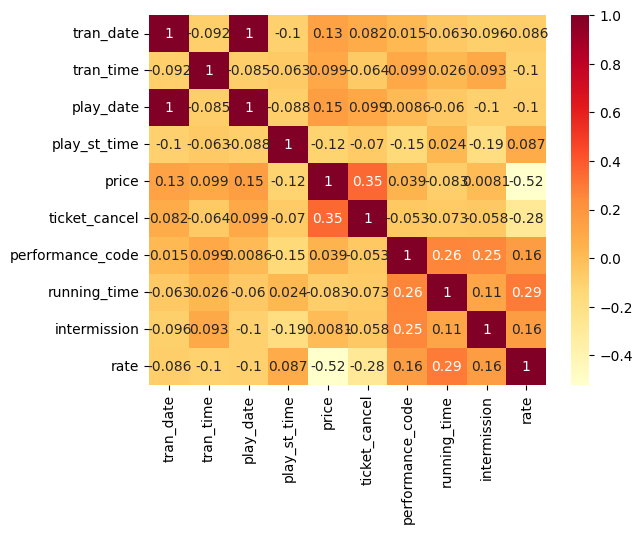

In [89]:
# df_con_9_merge
df_con_9_merge_non_string = df_con_9_merge.select_dtypes(exclude=['object'])

sns.heatmap(df_con_9_merge_non_string.corr(), annot = True, cmap = 'YlOrRd')